[Colab 🤩](https://drive.google.com/file/d/1YbXsW2neub0UHFra1OoqLK2-tjIPvaym/view?usp=sharing)

In [150]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [151]:
E_0 = 0.511
Epsilon = 0.75 
Teta_0 = 60
h = 6.6 * 10 ** -34
c = 3 * 10 ** 8
lambda_ = h * c / (Epsilon * 1.602e-13)
lambda_

1.6479400749063668e-12

In [152]:
femkameterToMeter =  2.4 * 10 ** -14
# _lambda = [86, 84, 83, 82.5, 0, 0]
# _lambda = map(lambda x: x * femkameter, _lambda)
# _lambda = list(_lambda)

Teta_1, Teta_2, Teta_3, Teta_4, Teta_5, Teta_6 = 0, 30, 60, 90, 120, 160
Δlambda_1, Δlambda_2, Δlambda_3, Δlambda_4, Δlambda_5, Δlambda_6  = 0, 59, 156 , 111, 14 , 198

data = {
    "Teta": [Teta_1, Teta_2, Teta_3, Teta_4, Teta_5, Teta_6],
    "lambda": [Δlambda_1, Δlambda_2, Δlambda_3, Δlambda_4, Δlambda_5, Δlambda_6],
}

df = pd.DataFrame(data)

df["lambda"] = df["lambda"].apply(lambda x: x * femkameterToMeter)
df["lambda_e"] = df["lambda"].apply(lambda x: x + lambda_)
# df["lambda_e"] = df["Δlambda"] + _lambda
df_prew = df.copy()
df_prew['lambda'] = df_prew['lambda'].apply(lambda x: x * 10 ** 9)
df_prew['lambda_e'] = df_prew['lambda_e'].apply(lambda x: x * 10 ** 9)
df_prew.T

,0,1,2,3,4,5
Teta,0.000000,30.000000,60.000000,90.000000,120.000000,160.000000
lambda,0.000000,0.001416,0.003744,0.002664,0.000336,0.004752
lambda_e,0.001648,0.003064,0.005392,0.004312,0.001984,0.006400


In [153]:
df.T

,0,1,2,3,4,5
Teta,0.000000e+00,3.000000e+01,6.000000e+01,9.000000e+01,1.200000e+02,1.600000e+02
lambda,0.000000e+00,1.416000e-12,3.744000e-12,2.664000e-12,3.360000e-13,4.752000e-12
lambda_e,1.647940e-12,3.063940e-12,5.391940e-12,4.311940e-12,1.983940e-12,6.399940e-12


In [154]:
delta_lambda = []
cos = []
Teta = []
lambda_c = 0.024 * 10 ** -10

for i in range(0, 180 + 1, 20):
	if i == 150:
		i = 160
	Teta.append(i)
	delta_lambda.append(lambda_c * (1 - np.cos(i)))
	cos.append(np.cos(i))

data2 = pd.DataFrame(Teta, columns=['Teta'])
data2['cos'] = cos
# data2['delta_lambda'] = data2['delta_lambda'].apply(lambda x: lambda_)
data2['delta_lambda'] = delta_lambda
data2['lambda'] = data2['delta_lambda'].apply(lambda x: x + lambda_)
data2_preview = data2.copy()
data2_preview['delta_lambda'] = data2_preview['delta_lambda'].apply(lambda x: x * 10 ** 9)
data2_preview['lambda'] = data2_preview['lambda'].apply(lambda x: x * 10 ** 9)
data2_preview.T

,0,1,2,3,4,5,6,7,8,9
Teta,0.000000,20.000000,40.000000,60.000000,80.000000,100.000000,120.000000,140.000000,160.000000,180.000000
cos,1.000000,0.408082,-0.666938,-0.952413,-0.110387,0.862319,0.814181,-0.197814,-0.975629,-0.598460
delta_lambda,0.000000,0.001421,0.004001,0.004686,0.002665,0.000330,0.000446,0.002875,0.004742,0.003836
lambda,0.001648,0.003069,0.005649,0.006334,0.004313,0.001978,0.002094,0.004523,0.006389,0.005484


In [155]:
data2.T

,0,1,2,3,4,5,6,7,8,9
Teta,0.000000e+00,2.000000e+01,4.000000e+01,6.000000e+01,8.000000e+01,1.000000e+02,1.200000e+02,1.400000e+02,1.600000e+02,1.800000e+02
cos,1.000000e+00,4.080821e-01,-6.669381e-01,-9.524130e-01,-1.103872e-01,8.623189e-01,8.141810e-01,-1.978136e-01,-9.756293e-01,-5.984601e-01
delta_lambda,0.000000e+00,1.420603e-12,4.000651e-12,4.685791e-12,2.664929e-12,3.304347e-13,4.459657e-13,2.874753e-12,4.741510e-12,3.836304e-12
lambda,1.647940e-12,3.068543e-12,5.648591e-12,6.333731e-12,4.312869e-12,1.978375e-12,2.093906e-12,4.522693e-12,6.389450e-12,5.484244e-12


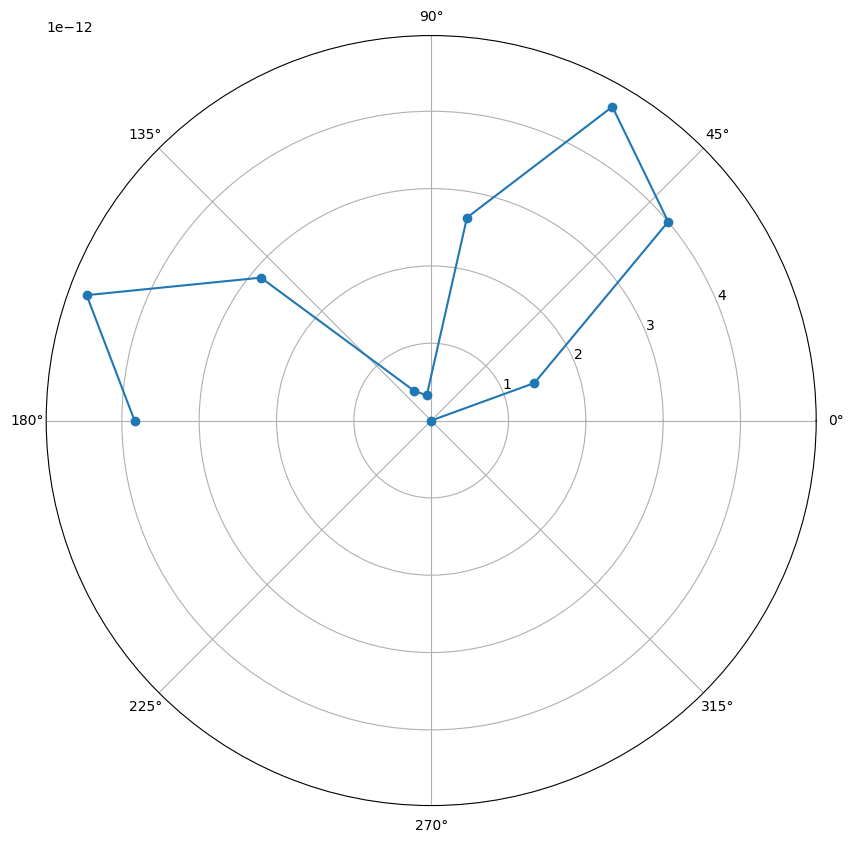

In [156]:
fig = plt.figure()
fig.set_size_inches(16,10)
ax = fig.add_subplot(111, projection='polar')

ax.plot(np.radians(data2["Teta"]), data2["delta_lambda"], marker='o')
# ax.plot(np.radians(data2["cos"]), data2["delta_lambda"], marker='o')

plt.show()

In [157]:
# x = Δlambda_3 * femkameterToMeter
x = Δlambda_3 * femkameterToMeter
y = Δlambda_5 * femkameterToMeter

Epsilon_lambda_1 = (abs((4.685791e-12 - x)) / 4.685791e-12)
Epsilon_lambda_2 = (abs((4.459657e-13 - y)) / 4.459657e-13)
Epsilon_lambda_1, Epsilon_lambda_2

(0.20098869113027013, 0.2465788288202434)

In [158]:
Epsilon2 = Epsilon / (( Epsilon / E_0) * (1 - np.cos(Teta_0) + 1))
Epsilon2

np.float64(0.17307876756731547)

In [159]:
Epsilon = Epsilon * 1.602e-13
impulse = Epsilon / c
impulse

4.005e-22

In [160]:
Epsilon2 = Epsilon2 * 1.602e-13
impulse2 = Epsilon2 / c
impulse2

np.float64(9.242406188094646e-23)

In [161]:
impulse_e = (impulse ** 2 - 2 * impulse * impulse2 * np.cos(Teta_0) + impulse2 ** 2) ** (1 / 2)
impulse_e

np.float64(4.893374950699126e-22)

In [162]:
m_e = 9.1 * 10 ** -31 
V = impulse_e * c / (((m_e * c) ** 2 + impulse_e ** 2) ** (1/2))
V

np.float64(261986328.89217567)

In [163]:
# процент скорости e от скорости c 
V/c

np.float64(0.873287762973919)